# El Método de Euler 

## Introducción

Hasta ahora, hemos visto ejemplos de modelos matemáticos de **sistemas de ecuaciones lineales** (SEL) y de **ecuaciones diferenciales ordinarias** (EDO) y vimos que en último caso, a veces es posible solucionar las ecuaciones de manera **exacta** usando los métodos aprendidos en Mate III.

Sin embargo, en la **mayoría de casos**, las ecuaciones son tan **difíciles de integrar** o en algunos casos **imposibles**, que se hace necesario buscar métodos alternativos a los tradicionales.

De esta necesidad es que justamente nacieron los **métodos numéricos**: Una forma de resolver problemas de todo tipo (no necesariamente ODEs) sin tener que solucionarlos explícitamente. 

Normalmente se hace el plan a continuación:

**Plan:**

1. Obtener las **ecuaciones del modelo** matemático mediante un método de pensamiento.
2. Obtener **aproximaciones** de las cantidades involucradas que generan conflicto en la solución.
3. Generar un **método iterativo** a partir de dicha aproximación.
4. Generar un **algoritmo** del método.
5. Generar la **implementación** del algoritmo mediante **programación** (e.g Python).
6. Generar la implementación para el **modelo en cuestión**.
7. Obtener la **solución numérica**.
8. Comparar con la **solución exacta** (si hay).
9. Calcular **errores** en la aproximación.
10. Validar con **datos reales**.

Recordemos, nuestro problema principal es

$$\frac{dx}{dt}=f(t,x),\text{     }x(t_{0})=x_{0}$$

esto es, la tasa de cambio instantáneo de la cantidad dependiente $x$, se puede modelar mediante la función $f(t,x)$. Además el experimento comienza en el momento $t_0$ con una cantidad inicial $x_0$ de la cantidad $x$.

## Procedimiento

### Aproximación 

Como ya tenemos la ecuación, necesitamos algun tipo de aproximación. En este caso, aproximaremos la derivada de la parte izquierda de la igualdad.

Recordemos en un punto $t$ fijo tenemos:

$$\frac{dx}{dt}=\lim_{h\to 0} \frac{x(t+h)-x(t)}{h}=\lim_{\Delta t \to 0}\frac{\Delta x}{\Delta t}$$

Como bien sabemos, $\lim$ es un concepto puramente matemático, e intentar aplicar esto en una computadora puede ser peligroso (precisión de punto flotante). Por esto, es mejor eliminar éste límite de la derivada y obtener la siguiente aproximación:

$$\frac{dx}{dt} \approx \frac{x(t+h)-x(t)}{h}$$

Entonces, nuestra ecuación original se puede transformar a:

$$\frac{x(t+h)-x(t)}{h} \approx \frac{dx}{dt} = f(t,x)$$

O sea,

$$\frac{x(t+h)-x(t)}{h} \approx f(t,x)$$

Despejado la ecuación para $x(t+h)$ obtenemos:

$$x(t+h)\approx x(t)+hf(t,x)$$

Esta fórmula se puede memorizar como:

**$$futuro=presente +paso*cambio$$**

**Observe** las siguientes cosas:

- $h$ es un paso en el tiempo. por ejemplo es el paso que se usa para ir de $t$ a $t+h$ (tiempo presente a tiempo futuro).
- $f(t,x)$ es el modelo que explica la tasa de cambio de la derivada temporal de $x$ (cómo cambia la cantidad $x$).


Gráficamente, el método se puede visualizar como lo siguiente (tomada de [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/800px-Euler_method.svg.png)):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/800px-Euler_method.svg.png" alt="Euler" width="500"/>

Entonces, podemos ver que $hf$ no es más que irse un paso hacia el futuro por medio de la recta que representa cuya pendiente es la derivada de la función $x$.

### Algoritmo

Retomemos.

Teníamos el problema

$$\frac{dx}{dt}=f(t,x),\text{     }x(t_{0})=x_{0}$$

y lo convertimos a

$$x(t+h)\approx x(t)+hf(t,x), \text{     }x(t_{0})=x_{0}$$

La anterior ecuación se conoce como el **Método de Euler**.

#### Método Iterativo: 

Comencemos a generar el método iterativo desde el inicio del experimento:

$$x(t_{0}+h)\approx x(t_{0})+hf(t_{0},x(t_{0}))$$

O sea, y **mucha atención**, la solución un "poquito" a futuro $x(t_0+h)$, **es casi** $x(t_{0})+hf(t_{0},x(t_{0}))$

**Como no es igual**, llamaremos a esta cantidad $x_1$ (**Primera aproximación numérica**).

Entonces (note el $=$ y no el $\approx$),

$$x_{1} = x(t_{0})+hf(t_{0},x(t_{0}))$$

Del mismo modo,

$$x(t_{0}+2h)\approx x(t_{0}+h)+hf(t_{0}+h,x(t_{0}+h))$$

![Dibujito](https://upload.wikimedia.org/wikipedia/commons/b/b6/Aplicaci%C3%B3n_del_m%C3%A9todo_de_Euler.jpg)

Ahora, y esto es **muy importante**, **no podemos calcular** 

$$f(t_{0}+h,x(t_{0}+h))$$

porque no tenemos exactamemte

$$x(t_{0}+h)$$

tan sólo una aproximación, llamada $x_1$.

#### Acto de Fe: 

**Asumiremos que $x(t_{0}+h)$ es muy cercano a $x_1$** (**no siempre es verdad**), tanto que si calculamos

$$f(t_{0}+h,x_1)$$

tendremos una buena aproximación de

$$f(t_{0}+h,x(t_{0}+h))$$

Quiero enfatizar que esto no siempre el posible, pues $f$ podría **potencialmente amplificar errores de forma dramática**.

Con este **acto de fé**, tendremos que

$$x_{2} = x_1+hf(t_0+h,x_1)$$

De tal manera de que si lo hacemos en el paso $i$, tendremos

$$x_{i+1} = x_{i}+hf(t_0+ih,x_{i})$$

Esta ecuación se conoce como el **algoritmo de Euler**.

**Tenga esto en la mente, pues la implementación en Python es casi directa del algoritmo**.

### Implementación

Ahora que tenemos nuestro método listo, nos preocuparemos por su implementación.

Para eso haremos un ejemplo en particular y luego, una vez hecha la implementación en Python, usaremos dicho procedimiento para solucionar una cantidad inimaginable de modelos.

**Plantilla:**

- Definir hiperparámetros
    - Definir parámetros experimentales y constantes físicas.
    - Definir modelo (o sea la f).
    - Definir condición inicial.
    - Definir intervalo de tiempo donde solucionaremos la ecuación.


 - Definir Parámetros numéricos
 - Solucionar EDO usando el método numérico
 - Graficar Resultados
 - Errores

Ahora, todo debería ser claro hasta este momento, excepto por el intervalo de tiempo.
 
Lo ideal sería solucionar para **todo el futuro**, pero ya sabemos que nuestro computador es incapaz de ir hasta el futuro lejano (finita memoria).
 
Entonces, lo que haremos es solucionar la ecuación en el intervalo $T=[t_0,t_f]$ (tiempo inicial, tiempo final).

Ahora, para tener noción de $t+h$, lo que haremos es particionar el intervalo $T$ en pequeños intervalos más pequeños.

$$T=[t_0,t_0+h,t_0+2h,\dots,t_f]$$

o, de manera más compacta,

$$T=[t_0,t_1,t_2,\dots,t_f]$$




[Particion](Imagen_aqui)

Esto es posible de implementar en Python usando el comando ```linspace``` del paquete ```numpy```.

**Resumen:**

Entonces,

$$x(t+h)\approx x(t)+hf(t,x), \text{     }x(t_{0})=x_{0}$$

se convierte a

$$x_{i+1} = x_{i}+hf(t_0+ih,x_{i})$$

que en Python, se convierte a

$$x[i+1]= x[i]+h\text{*}f\bigl(t[i],x[i]\bigr), \text{     }x[0]=x0$$


Para evitar hacer un método numérico para cada ecuación, hagamos una **función en Python** que ejecute el método numérico para cualquier modelo posible (EDO de primer orden).

Una posible implementación es la siguiente:

In [1]:
# Parámtetros de la función

# f = modelo
# x0 = condición inicial
# t0 = tiempo inicial
# tf = tiempo final
# n número de puntos en T=[t0,tf]

def EulerM(f,x0,t0,tf,n):
    
    #Particionar el intervalo de tiempo
    t=np.linspace(t0,tf,n)
    
    # Calcular h a partir de la partición
    h=abs(t[1]-t[0])
    
    # Alojamiento de memoria para mejor tiempo de procesamiento
    # En este vector se irán acumulando los resultados del método numérico
    x=np.empty(n)
    
    # condición inicial
    x[0]=x0
    
    # Ciclo for para iterar sobre todos los puntos de la partición
    for i in range(n-1):
        
        # Futuro = Presente + Paso*Cambio
        x[i+1]=x[i]+h*f(t[i],x[i])
    
    # Regresar los valores calculados
    return t,x

Esta función se convertirá en una función de un **futuro módulo**.

Ahora ejecutemos la plantilla descrita con la ecuación

$$\frac{dx}{dt}=\frac{2}{\sqrt{\pi}}e^{-t²},\text{    }x(-3)=-1$$

Recordemos que 

$$\int e^{-t²}dt$$

**No es posible resolverla** por métodos de Mate II y de hecho, es imposible escribirla como una función de las elementales que conocemos (Fuente).

**Por favor, documente el siguiente código adecuadamente.**

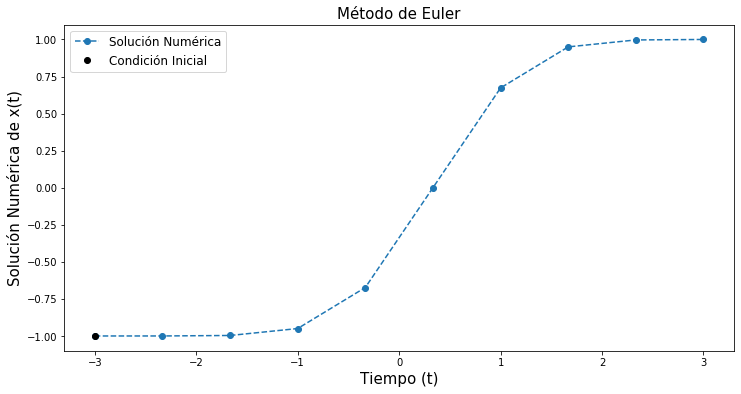

In [2]:
import numpy as np
import matplotlib.pyplot as plt
k=2/np.sqrt(np.pi)
f = lambda t,x: k*np.exp(-t**2)
x0=-1
t0=-3
tf=3
n=10
t,x=EulerM(f,x0,t0,tf,n)
plt.figure(figsize=(12,6))
plt.plot(t,x,'o--',label="Solución Numérica")
plt.plot(t[0],x[0],'ko', label="Condición Inicial")
plt.xlabel("Tiempo (t)",fontsize=15)
plt.ylabel("Solución Numérica de x(t)",fontsize=15)
plt.title("Método de Euler",fontsize=15)
plt.legend(fontsize=12)
plt.show()

Si aumentamos el parámetro $n$, o sea si dividimos en intervalo en más partes, deberiamos esperar una mejor aproximación, pues esto implicaría aproximarnos más y más a la derivada teórica. Miremos:

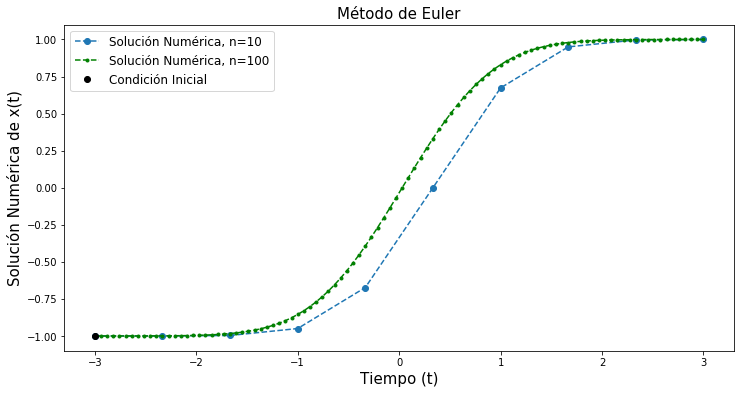

In [3]:
### Parámetros Numéricos (Dividir T=[-3,3] en 100 partes)
n=100

### Solución Numérica
t1,x1=EulerM(f,x0,t0,tf,n)


### Gráficos
plt.figure(figsize=(12,6))

plt.plot(t,x,'o--',label="Solución Numérica, n=10")
plt.plot(t1,x1,'g.--',label="Solución Numérica, n=100")
plt.plot(t[0],x[0],'ko', label="Condición Inicial")
plt.xlabel("Tiempo (t)",fontsize=15)
plt.ylabel("Solución Numérica de x(t)",fontsize=15)
plt.title("Método de Euler",fontsize=15)
plt.legend(fontsize=12)
plt.show()

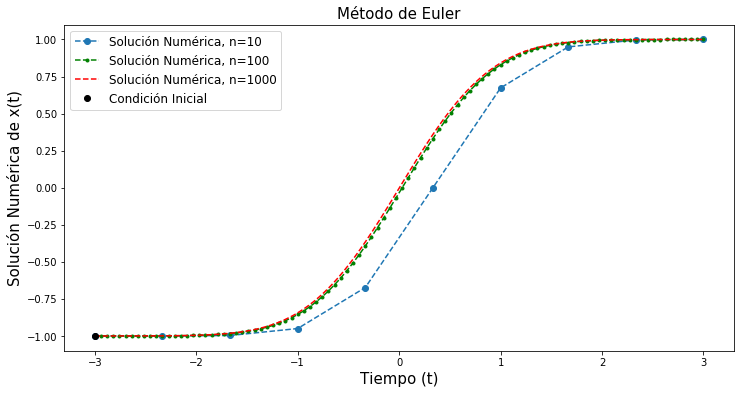

In [4]:
### Parámetros Numéricos (Dividir T=[-3,3] en 1000 partes)
n=1000

### Solución Numérica
t2,x2=EulerM(f,x0,t0,tf,n)


### Gráficos
plt.figure(figsize=(12,6))

plt.plot(t,x,'o--',label="Solución Numérica, n=10")
plt.plot(t1,x1,'g.--',label="Solución Numérica, n=100")
plt.plot(t2,x2,'r--',label="Solución Numérica, n=1000")
plt.plot(t[0],x[0],'ko', label="Condición Inicial")
plt.xlabel("Tiempo (t)",fontsize=15)
plt.ylabel("Solución Numérica de x(t)",fontsize=15)
plt.title("Método de Euler",fontsize=15)
plt.legend(fontsize=12)
plt.show()

**Observe algo importante:** 

A medida que $n$ es grande, $h$ es pequeño y obtenemos una mucho mejor aproximación.

Pero **cuidado**, después de cierto punto, si se usted se vuelve muy avaro ($n \approx 10^8$), su computador personal dejará de responder, pues deberá almacenar en memoria un vector demasiado grande. 

Mucho cuidado...

### Tarea

Resuelva las siguientes ecuaciones usando el método de Euler y muestre para cuál $n$ la solución deja de cambiar radicalmente:

1.
$$\frac{dP}{dt}=kP,\text{   }P(0)=2,\text{   en  }T=[0,100]$$
2.
$$\frac{dP}{dt}=kP\biggl(1-\frac{P}{S}\biggr),\text{   }P(0)=2,\text{   en  }T=[0,100],\text{   }S=100000$$
3.
$$\frac{dv}{dt}=g-\frac{c_d}{m}v^{2},\text{   }v(0)=-3,\text{   en  }T=[0,30]$$
4.
$$\frac{dx}{dt}=e^{-t^2}\sinh(x), \text{  }x(-5)=0$$
5.
$$\frac{dx}{dt}=\tanh(xt)+\ln(t^2)e^{-x^2}, \text{  }x(-1)=2$$